#### Extract most common words appearing in a single text corpus

In [1]:
# Importing libraries

import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read input file, note the encoding is specified here 
# It may be different in your text file

file = open('New Text Document.txt', encoding="utf8")
a= file.read()

# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['mr','mrs','one','two','said']))

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
    
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)

How many most common words to print: 10

OK. The 10 most common words are as follows

and :  18
the :  12
of :  8
to :  7
a :  4
with :  4
has :  4
as :  4
we :  3
tech :  3


<AxesSubplot: xlabel='Word'>

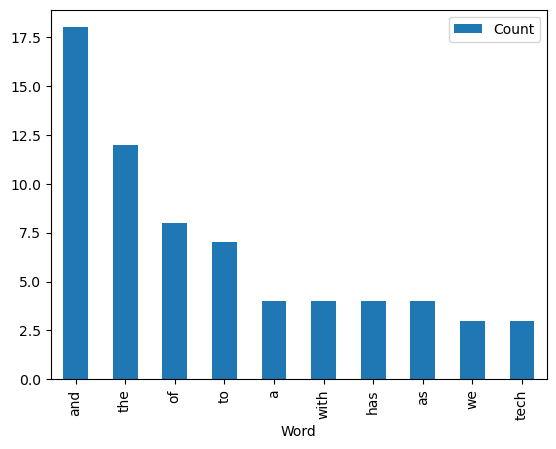

In [3]:
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')